Lab Objective: This lab discusses a classical calculus of variations problem: how
is a river to be crossed in the shortest possible time? We will look at a numerical
solution using the pseudospectral method.

In [20]:
import numpy as np
from scipy import integrate
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.interpolate import barycentric_interpolate
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D
import scipy

# Problem 1

In [14]:
def c(x):
    return -.7*((x**2)-1)
def alpha(x):
    return 1./np.sqrt((1-c(x)**2))
def L(x,y,y_prime):
    return alpha(x)*np.sqrt(1+(alpha(x)*y_prime(x))**2)-c(x)*y_prime(x)*alpha(x)**2
def T(y,y_prime):
    return integrate.quad(L,-1,1,args = (y,y_prime))
def T2


# Problem 2

In [17]:
def my_y(x):
    return (5./2)*x+5./2
def my_y_prime(x):
    return 5./2

print "The upper bound is: " + str(T(my_y,my_y_prime)[0])

The upper bound is: 3.87708204914


In [18]:
print "The upper bound is: " + str(T(my_y,my_y_prime)[0])

The upper bound is: 3.87708204914


In [19]:
print "From looking at the graph of Sec theta we can infer that the lower bound is: 2"

From looking at the graph of Sec theta we can infer that the lower bound is: 2


# Problem 3

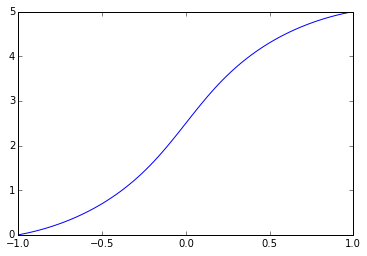

In [28]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

N  = 20
D, X = cheb(N)

def F(U):  
    F = np.dot(D, alpha(X)**3*np.dot(D,U)*(1./np.sqrt((1+alpha(X)**2*np.dot(D,U)**2)))-\
                 alpha(X)**2*c(X))
    F[0], F[-1] = U[0]-5,U[-1]-0
    return F
guess = np.zeros(N+1)
sol = root(F,guess).x
x_vals = np.linspace(-1,1,100)
y_vals = scipy.interpolate.barycentric_interpolate(X,sol,x_vals)
plt.plot(x_vals,y_vals)
plt.legend(loc=2)

plt.show()


# Problem 4

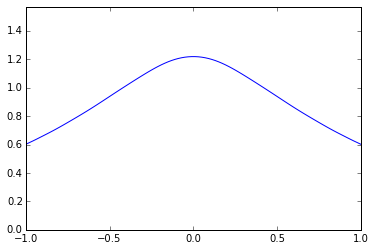

In [35]:
y_prime = np.dot(D,sol)
def func(z,x):
    return y_prime-c(x)/np.cos(z)-np.tan(z)
guess = np.ones(21)
sol2 = root(func,guess, args = (X)).x
x_vals = np.linspace(-1,1,100)
y_vals = scipy.interpolate.barycentric_interpolate(X,sol2,x_vals)
plt.plot(x_vals,y_vals)
plt.ylim(0,np.pi/2)
plt.show()